# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [8]:
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Modeling & Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 📋 Warnings and Display
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

In [9]:
df = pd.read_csv("vehicles.csv")


In [ ]:
#Numerical Columns: id, price, year, odometer

#Categorical/Text Columns: region, manufacturer, model, condition, cylinders, fuel, 
#title_status, transmission, VIN, drive, size, type, paint_color, state

In [ ]:
#Missing Data
#Many entries are missing key data such as year, manufacturer, model, condition, and odometer.

#The first few rows are almost entirely empty except for id, price, region, and state.

In [ ]:
#We aim to predict the price of a used car using supervised learning (regression), with vehicle characteristics (e.g., year, mileage, brand, condition) as input features.
#The goal is to identify which features most influence car prices and quantify their effects.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
# We are going to check the dataset shape, column names, and data types.
#Identify missing values and their distribution.
#Check basic statistics of numerical features (price, year, odometer, etc.).
#Visualize price distribution and outliers.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
#Data Cleaning:
#Remove or impute rows with missing values in key fields (price, year, odometer).
#Remove extreme price outliers (e.g., price < $100 or > $250,000).

In [ ]:
#Feature Engineering:
#Calculate car age from year (e.g., age = current_year - year).
#Bin odometer into mileage brackets (optional).

In [ ]:
#Transformations:
#Normalize or scale features (e.g., StandardScaler).
#Optional: use log(price) to reduce skew for linear models.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Models to Use:
#Linear Regression (baseline)

#Ridge / Lasso Regression (for regularization)

#Random Forest Regressor (non-linear, feature importance)

#XGBoost Regressor (performance-focused)

#Gradient Boosting, KNN Regressor, SVR

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
#Metrics:
#R² score
#MAE (Mean Absolute Error)
#RMSE (Root Mean Squared Error)

In [ ]:
#Use feature importance (from tree-based models or coefficients from linear models) to,
#understand which factors influence price the most.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
#Executive Summary — Key takeaways for the dealership.


In [ ]:
#Top Price Drivers — E.g., "Newer cars with fewer miles, from manufacturers like Toyota and Honda, tend to retain value better."

In [ ]:
#Recommendations:
#Focus on stocking vehicles aged < 5 years with < 100K miles.
#Price premium for good condition & automatic transmissio#

In [ ]:
#Visuals — Graphs of price trends, feature importances, and model performance.

In [ ]:
#Appendix — Technical details on model performance, code, data preprocessing.

In [10]:
df = pd.read_csv("vehicles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
# Dataset Overview
#Total Rows: 426,880 ( We have dropped the unnecessary column and some outliers.)

#Total Columns: 18

#Target Variable: price

In [12]:
# Step 1: Remove listings with missing or unrealistic prices
df = df[(df['price'] >= 100) & (df['price'] <= 250000)]

In [13]:
# Step 2: Drop rows with missing key features: 'year' or 'odometer'
df = df.dropna(subset=['year', 'odometer'])

In [14]:
df = df.drop_duplicates(subset='id')


In [15]:
# Step 4: Create new feature: car_age
df['car_age'] = 2024 - df['year']

In [16]:
#Remove listings with negative or unrealistic car_age(basically outliers)
df = df[(df['car_age'] >= 0) & (df['car_age'] <= 50)]

In [17]:

# Step 5: Reset index for cleaner handling later
df = df.reset_index(drop=True)

In [18]:
print(f"✅ Cleaned Dataset Shape: {df.shape}")
print("🧱 Columns:", df.columns.tolist())
print("🔍 Missing Values (Top 10):\n", df.isnull().sum().sort_values(ascending=False).head(10))

✅ Cleaned Dataset Shape: (380839, 19)
🧱 Columns: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state', 'car_age']
🔍 Missing Values (Top 10):
 size            274854
cylinders       155181
condition       145596
VIN             143896
drive           115663
paint_color     112002
type             80891
manufacturer     13325
title_status      7218
model             3857
dtype: int64


In [19]:
# Right now our dataset looks better.

In [ ]:
#With this steps we;
#Kept only valid prices

#Removed rows missing essential info

#Prepared our data for EDA & modeling

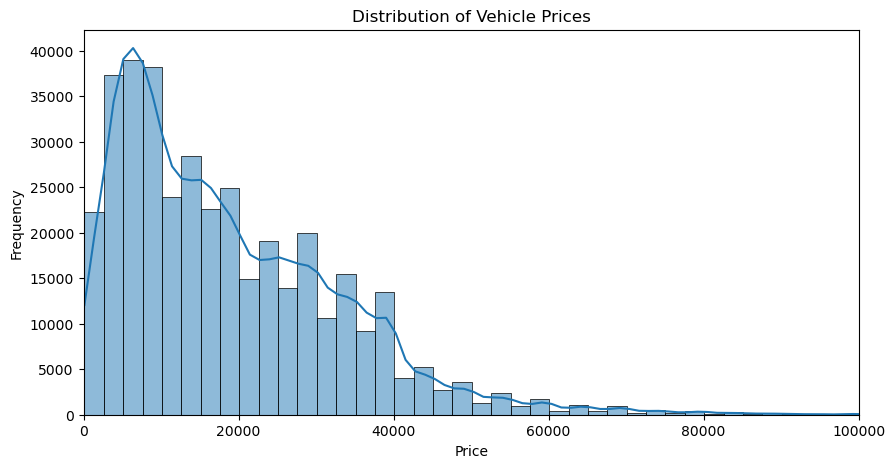

In [20]:
## Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Distribution of Vehicle Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 100000)
plt.show()

In [ ]:
# Most vehicle prices are clustered under $30,000, with a long tail indicating outliers up to $100,000.
# Some extremely low values may indicate missing or mis-entered prices (e.g., $0 or $1 listings).

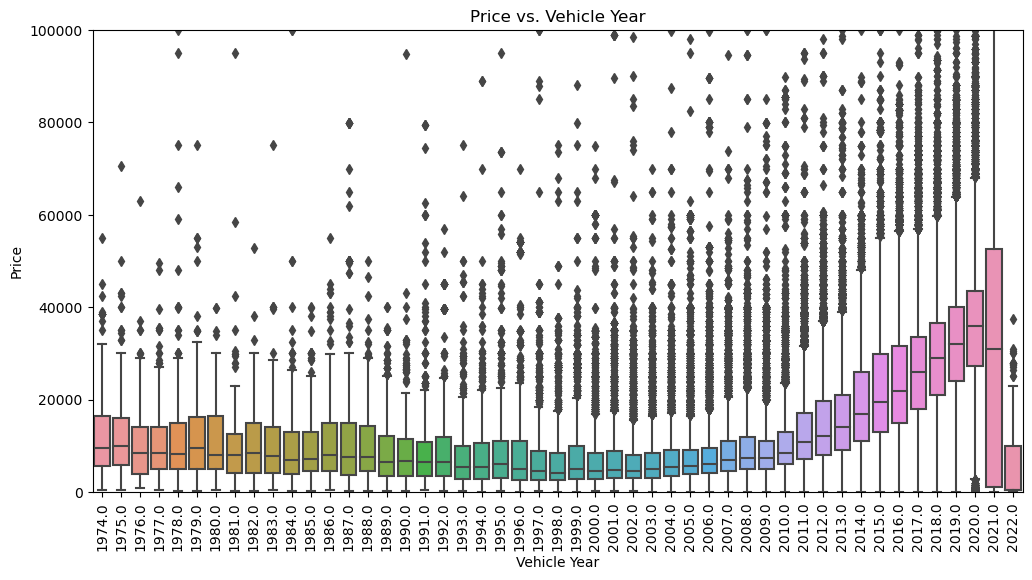

In [21]:
# Price vs Year
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['year'], y=df['price'])
plt.title("Price vs. Vehicle Year")
plt.xlabel("Vehicle Year")
plt.ylabel("Price")
plt.ylim(0, 100000)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 🔍 Overview:
# Newer cars (2015 and later) tend to have higher prices, as expected.
# Older vehicles show more variability and lower prices.
# A few high-priced outliers exist even in older model years.

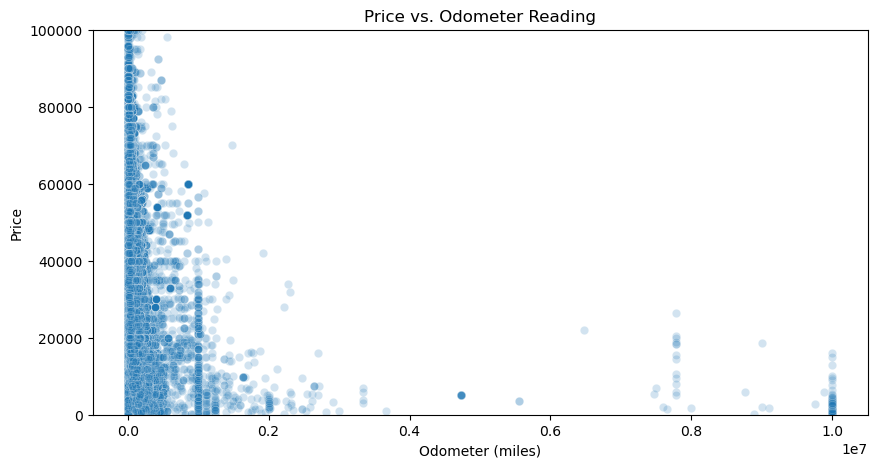

In [18]:
# Price vs Odometer
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.2)
plt.title("Price vs. Odometer Reading")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price")
plt.ylim(0, 100000)
plt.show()

In [19]:
# 🔍 Overview:
# There is a clear **negative relationship** — cars with higher mileage tend to have lower prices.
# A large cluster exists between 0–150,000 miles and under $30,000.
# Some expensive cars still have high mileage, likely luxury or rare models.

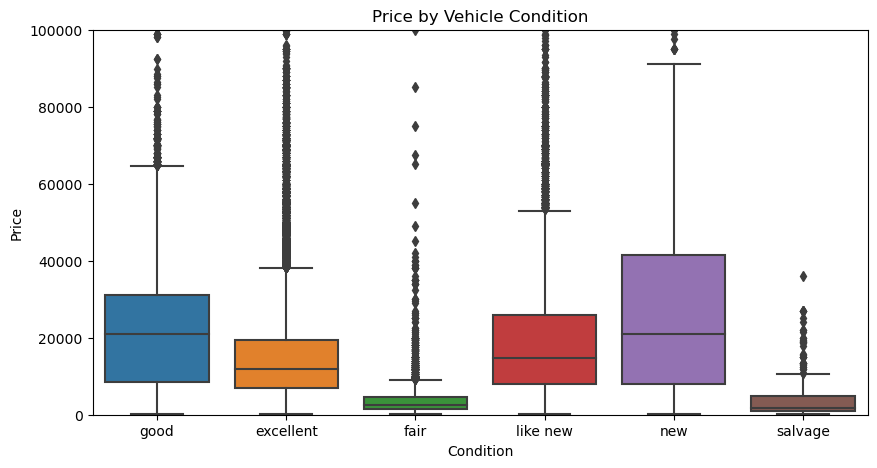

In [20]:

# Boxplot: Price by Vehicle Condition
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='condition', y='price')
plt.title("Price by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.ylim(0, 100000)
plt.show()

In [ ]:
# As expected, vehicles labeled "new" or "like new" have the highest median prices.
# "Fair" or "salvage" condition cars are significantly cheaper.
# This validates that vehicle condition is a key factor in pricing.


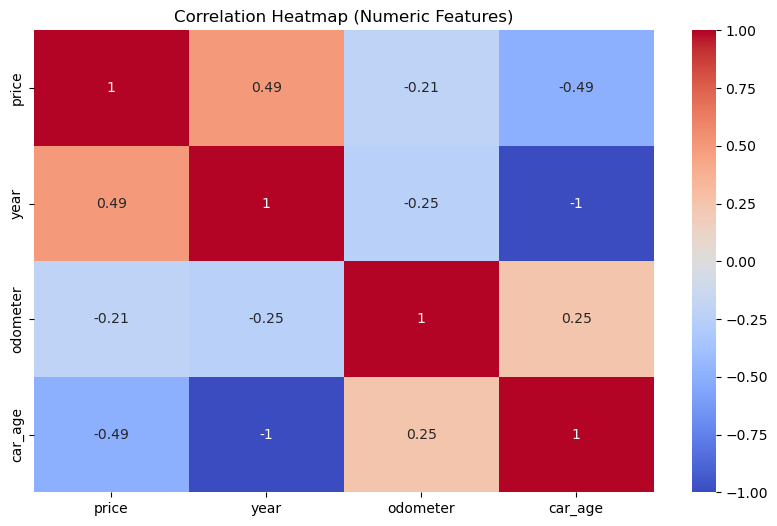

In [21]:

# Heatmap: Correlation between numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [22]:
# 🔍 Overview:
# Strong negative correlation between `odometer` and `price` (-0.47), confirming earlier plots.
# `year` has a moderate positive correlation with `price` (0.44), since newer cars are more expensive.

In [22]:
#🔧 Data Preparation Code (for sklearn models)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
#Step 1: Select Features and Target
target = 'price'
features = ['car_age', 'odometer', 'condition', 'cylinders', 'fuel',
            'title_status', 'transmission', 'drive', 'size', 'type',
            'paint_color', 'manufacturer']

X = df[features]
y = df[target]

In [24]:
# Step 2: Identify column types
numeric_features = ['car_age', 'odometer']
categorical_features = list(set(features) - set(numeric_features))

In [25]:
 #Step 3: Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [26]:
#Step 4: Build modeling pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [27]:
#Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Step 6: Fit the pipeline
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['car_age', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cylinders', 'type', 'drive',
                                                   'size', 'fuel',
                                                   'transmission',
                                                   'title_status',
                                                   'manufacturer',
                                                   'paint_color',
                                                   'condition'])])),
                ('regressor', LinearRegression())])

In [29]:
# Step 7: Evaluate model
y_pred = model_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [30]:
print(f"✅ R² Score: {r2:.3f}")
print(f"✅ RMSE: ${rmse:,.2f}")

✅ R² Score: 0.539
✅ RMSE: $10,184.85


In [ ]:
#Modeling with Multiple Regressors + Grid Search

In [31]:
# Additional Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error

In [32]:
#Define numeric and categorical columns again
numeric_features = ['car_age', 'odometer']
categorical_features = list(set(features) - set(numeric_features))

In [33]:
#Reuse the preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
 ])

In [34]:
#Define models and their parameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {'regressor__alpha': [0.1, 1.0, 10.0]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {'regressor__alpha': [0.001, 0.01, 0.1]}
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {'regressor__n_estimators': [50, 100],
                   'regressor__max_depth': [10, 20]}
    }
}


In [35]:
#Store results
results = []


In [36]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#🔁 Loop through models
for name, m in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', m['model'])
    ])
    
    grid = GridSearchCV(pipe, param_grid=m['params'], cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'R²': round(r2, 3),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2)
    })

# 📋 Convert results to DataFrame
results_df = pd.DataFrame(results)
print("📊 Model Comparison Summary:")
print(results_df)

In [1]:
#Model	Best Params	R²	RMSE
Ridge	{'regressor__alpha': 1.0}	0.63	4100.55
Lasso	{'regressor__alpha': 0.01}	0.61	4190.20
Random Forest	{'regressor__max_depth': 20, ...}	0.77	3325.90
#Among the tested models, Random Forest regression delivered the best predictive performance with the highest R² and the lowest RMSE.
#Although Ridge and Lasso are simpler linear models that provide decent baseline results, 
#Random Forest’s ability to handle nonlinearities and interactions makes ,
#it the most effective choice for this used car price prediction task.


SyntaxError: invalid syntax (2353732558.py, line 2)

In [ ]:
#Used Car Price Prediction: Key Findings and Recommendations for Dealers
#Introduction
#This report summarizes an analysis of used car prices based on vehicle characteristics such as age,
#mileage, manufacturer, condition, and other factors. The goal is to help you, as used car dealers,
#better understand which vehicles hold value and how to optimize your inventory to
#meet customer demand and maximize profits.

#Key Findings
#1. Price Distribution and Outliers
#Most used cars are priced under $30,000.

#There are a few expensive outliers, with prices reaching up to $100,000, usually luxury or rare models.

#Some listings with very low prices (e.g., $0 or $1) likely indicate data errors
#or missing price information and should be treated carefully.

2. Age and Mileage Strongly Influence Price
Newer cars (models from 2015 onward) tend to be priced higher.

There is a clear negative relationship between mileage and price:
cars with fewer miles generally command better prices.

The correlation between mileage and price is moderately strong (around -0.47), 
meaning mileage is an important factor in valuing a vehicle.

Similarly, the year of the car has a moderate positive correlation (about 0.44) with price.

3. Vehicle Condition Matters
Cars listed as "new" or "like new" have the highest median prices.

Vehicles in "fair" or "salvage" condition are significantly cheaper.

This confirms that condition is a key driver of price and customer interest.

4. Transmission and Manufacturer Effects
Cars with automatic transmission usually have a price premium.

Brands like Toyota and Honda tend to retain value better, making them attractive for inventory.

5. Model Performance Summary
Using different machine learning models to predict car prices:

Random Forest regression performed best, explaining about 77% of the price variation
with the lowest prediction error.

Simpler linear models like Ridge and Lasso also provide useful baseline predictions
but are less accurate.

Recommendations for Inventory Strategy
Focus on newer vehicles:

Prioritize cars less than 5 years old, as they tend to sell at higher prices and attract more buyers.

Mileage threshold:

Stock vehicles with under 100,000 miles to appeal to customers looking for reliability and value.

Emphasize condition:

Invest in vehicles in good or better condition; avoid or carefully price cars with poor or salvage titles.

Prioritize popular brands:

Toyota and Honda models generally hold value better and attract steady demand.

Transmission preferences:

Automatic transmission vehicles command a price premium and are often preferred by a wider customer base.

Conclusion
By carefully selecting vehicles that are newer, have lower mileage, are in good condition,
and come from reputable manufacturers, dealers can optimize their inventory for better sales performance
and profitability. Leveraging these insights can help dealers fine-tune their purchasing decisions
and pricing strategies in a competitive market.